# Transactions Fraud Detection

**Authors:** Peter Macinec, Timotej Zatko

## Data Analysis

### Setup and reading the data

In [10]:
import numpy as np
import pandas as pd

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [41]:
sns.set(style="whitegrid")

plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [3]:
df_identities = pd.read_csv('../data/identities.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

### Descriptive data analysis

In [4]:
df_identities.shape

(144233, 41)

In [5]:
df_transactions.shape

(590540, 394)

In [6]:
df_identities.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
df_transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


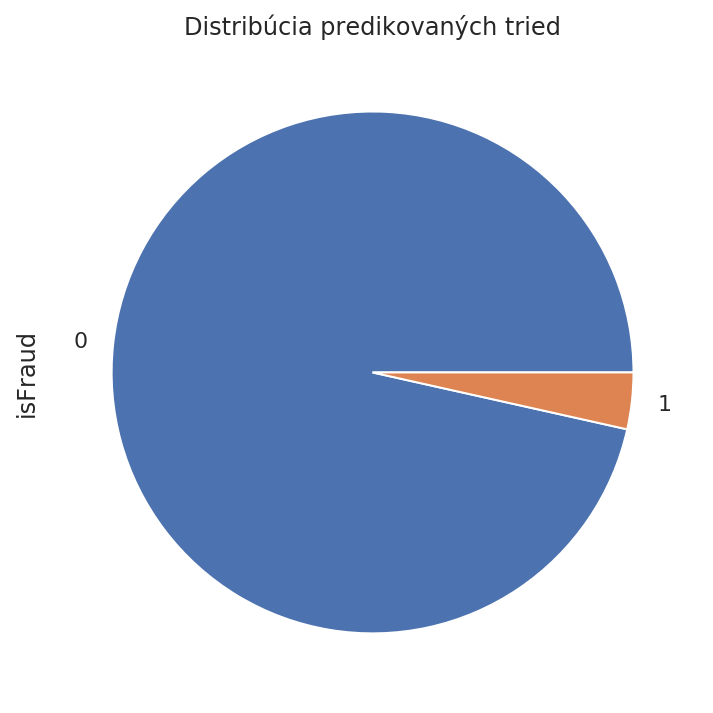

In [42]:
df_transactions.isFraud.value_counts().plot(kind='pie', title='Distribúcia predikovaných tried');

In [9]:
df_transactions.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

#### Missing values

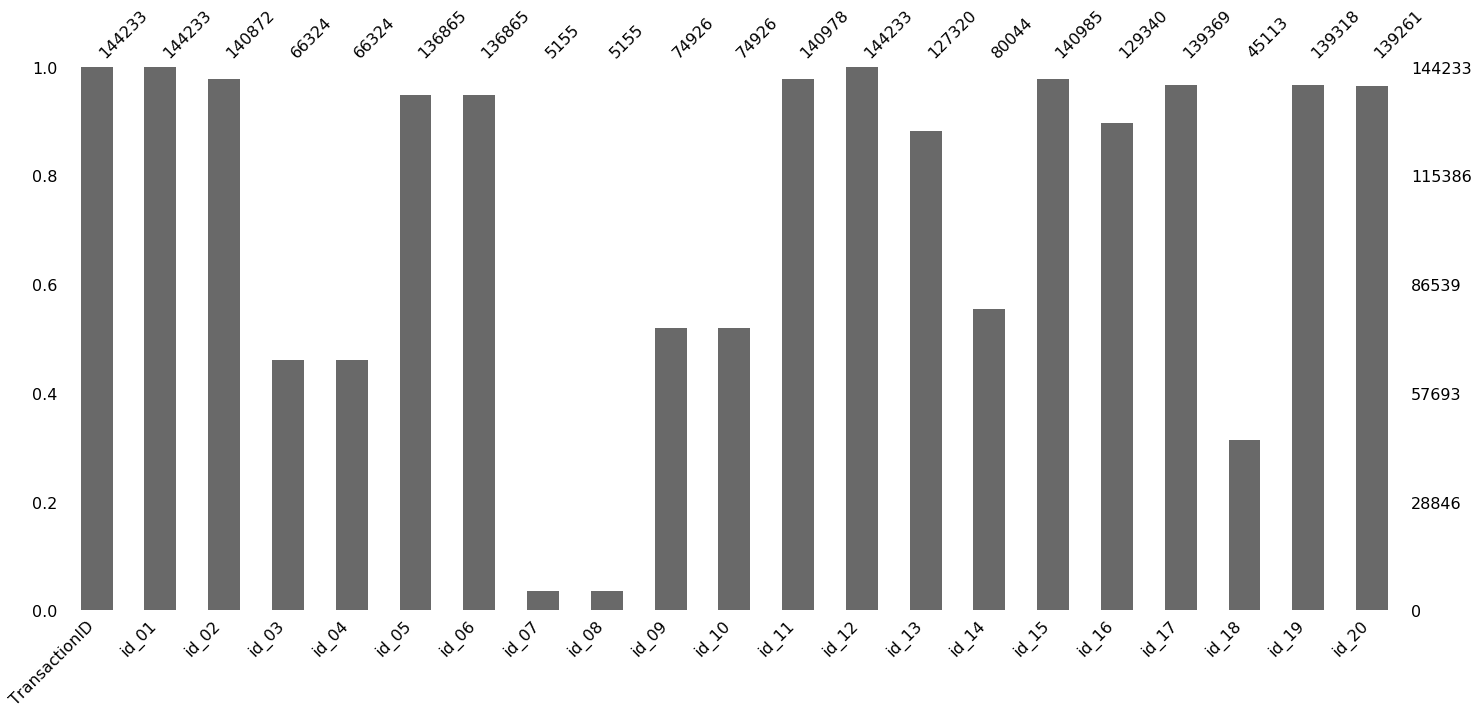

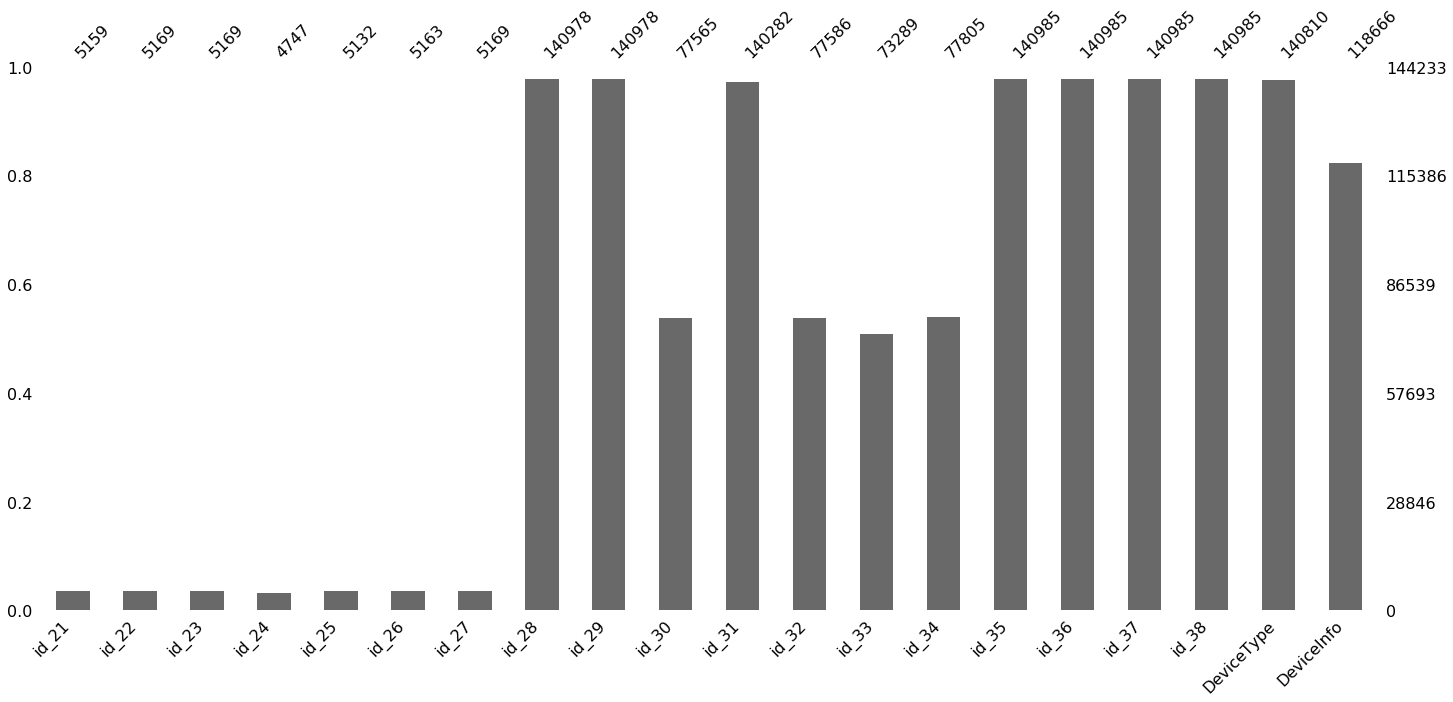

In [13]:
plot_count = 2
column_groups = np.array_split(df_identities.columns, plot_count)

for columns in column_groups:
    msno.bar(df_identities[columns])
    plt.show()

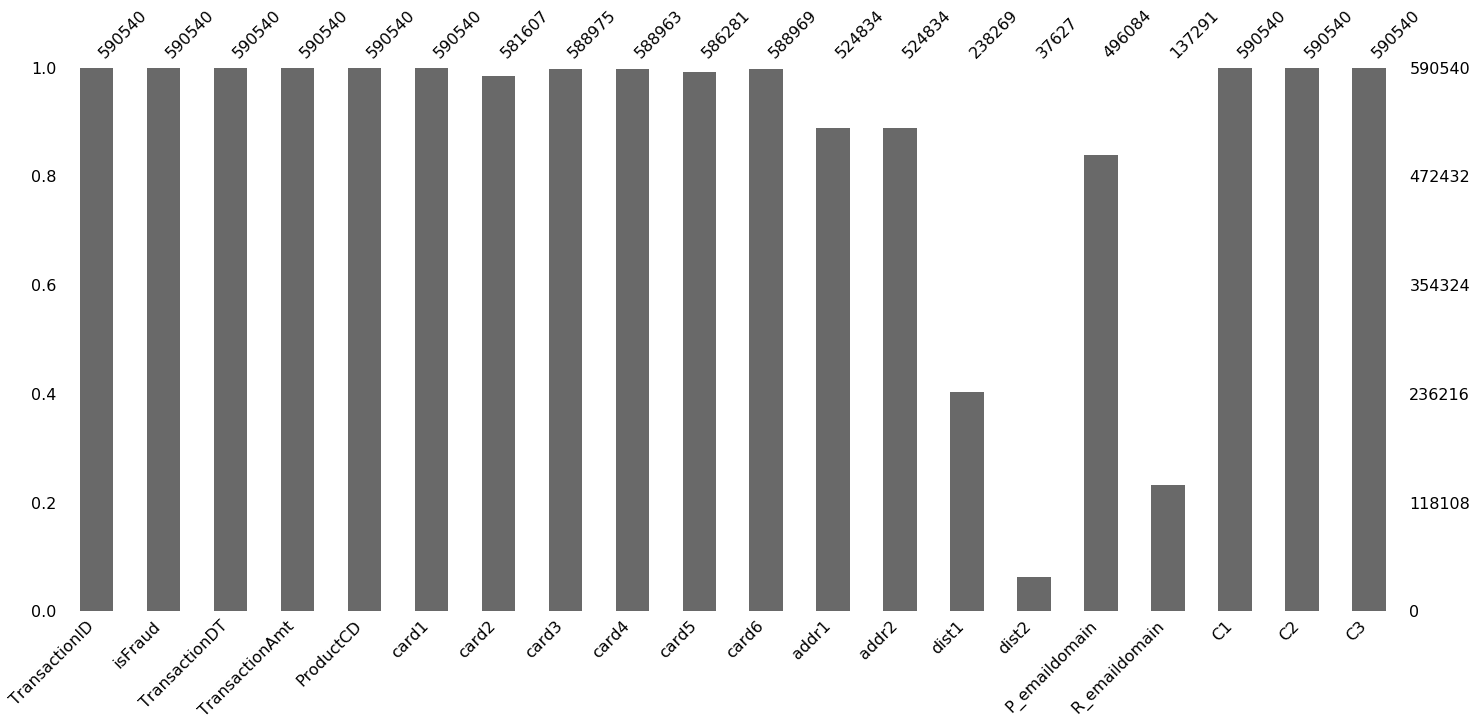

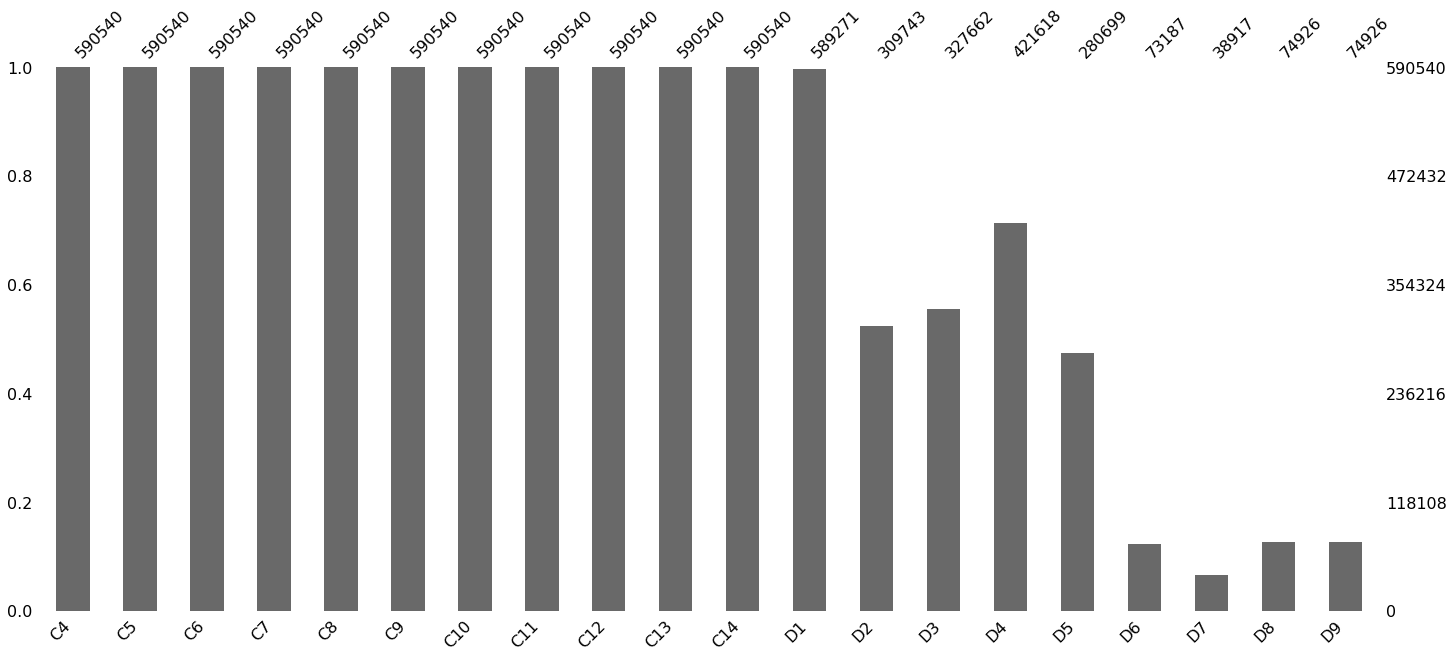

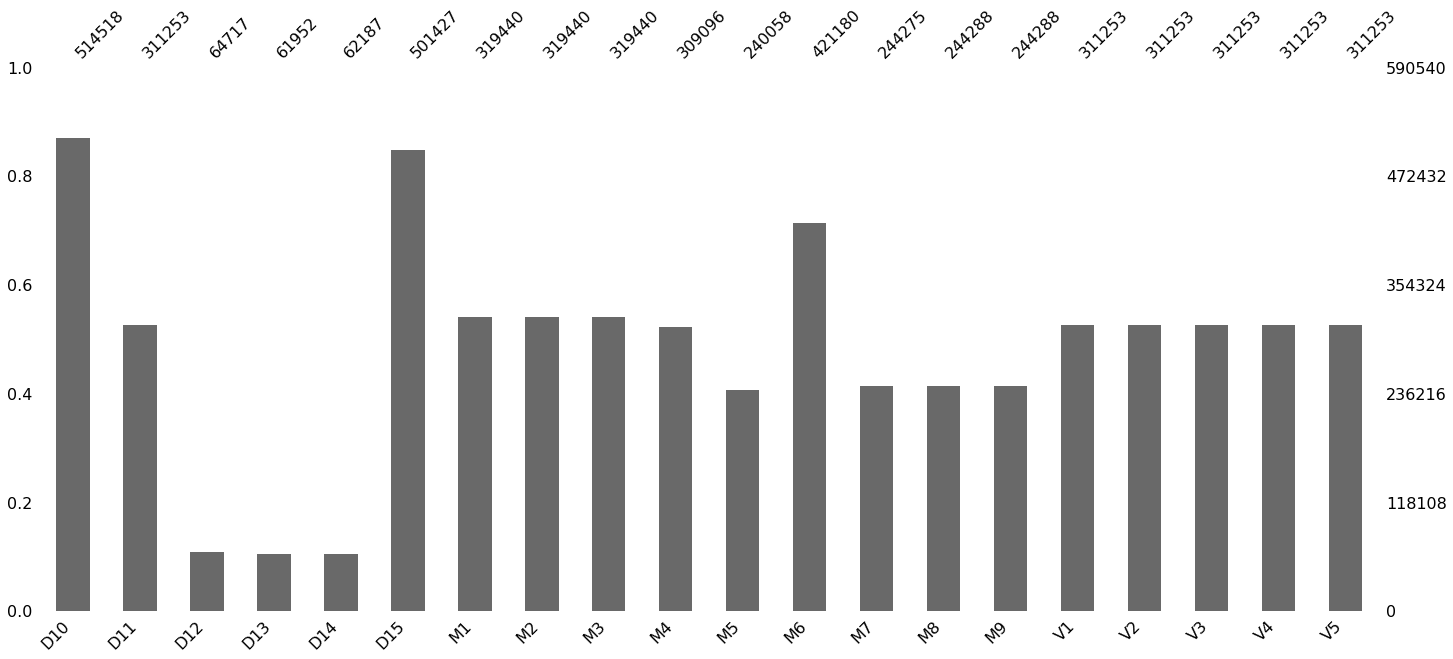

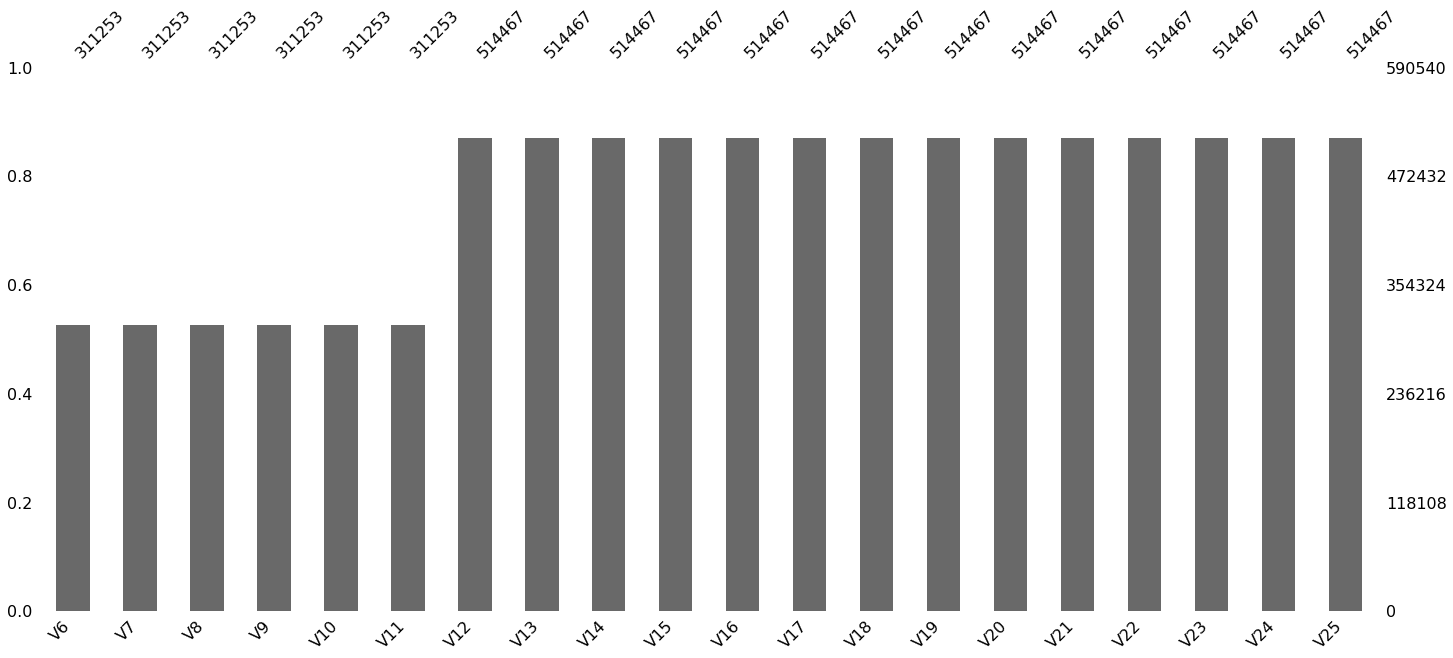

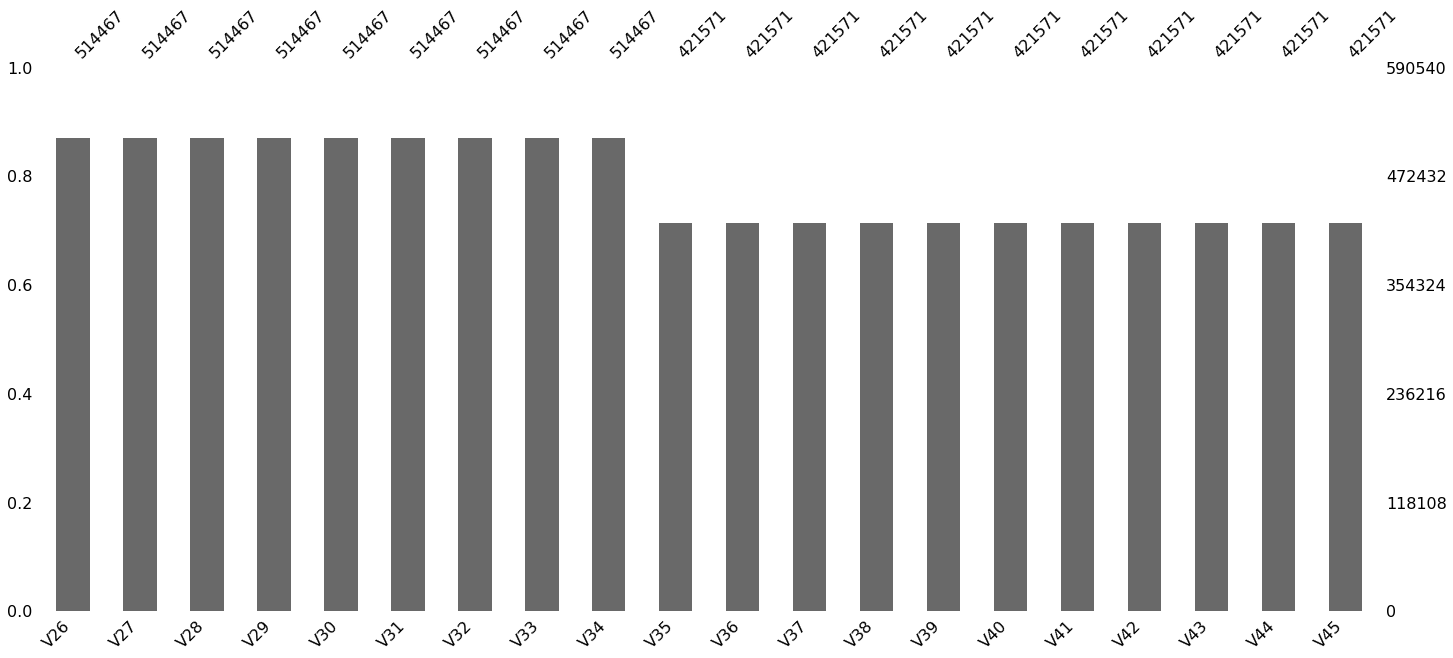

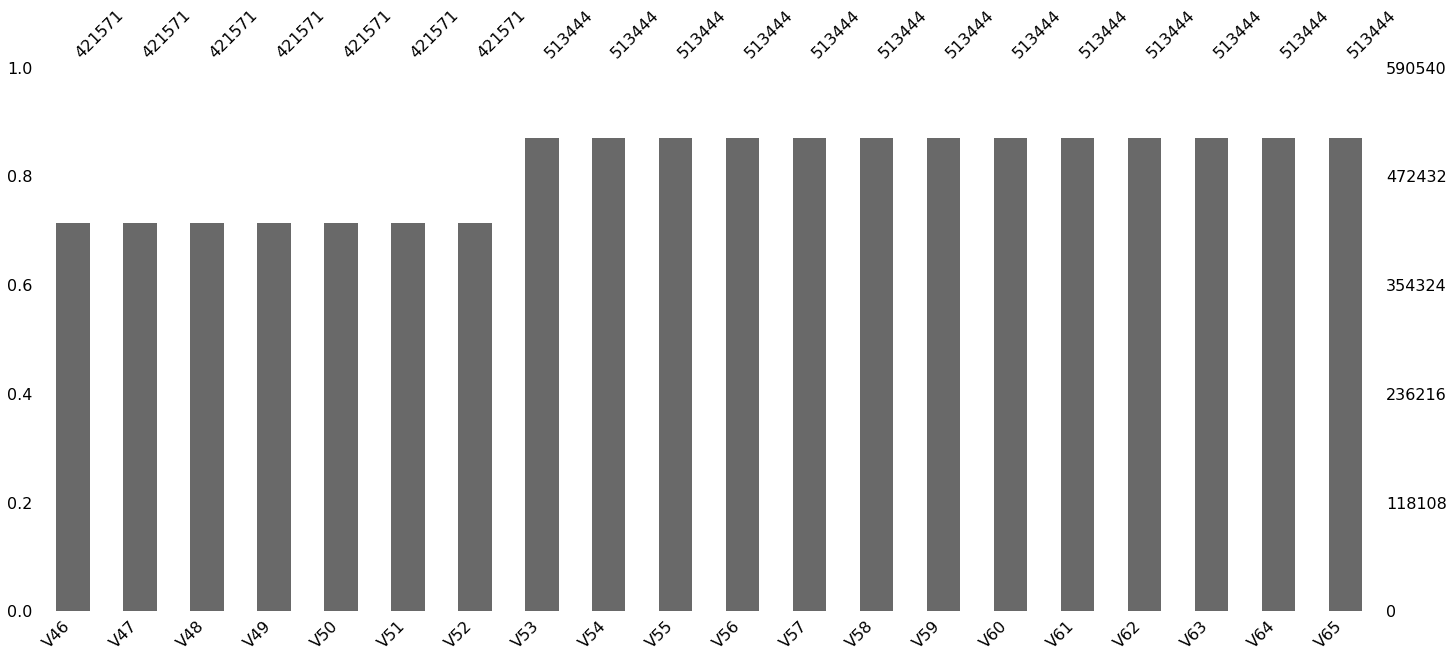

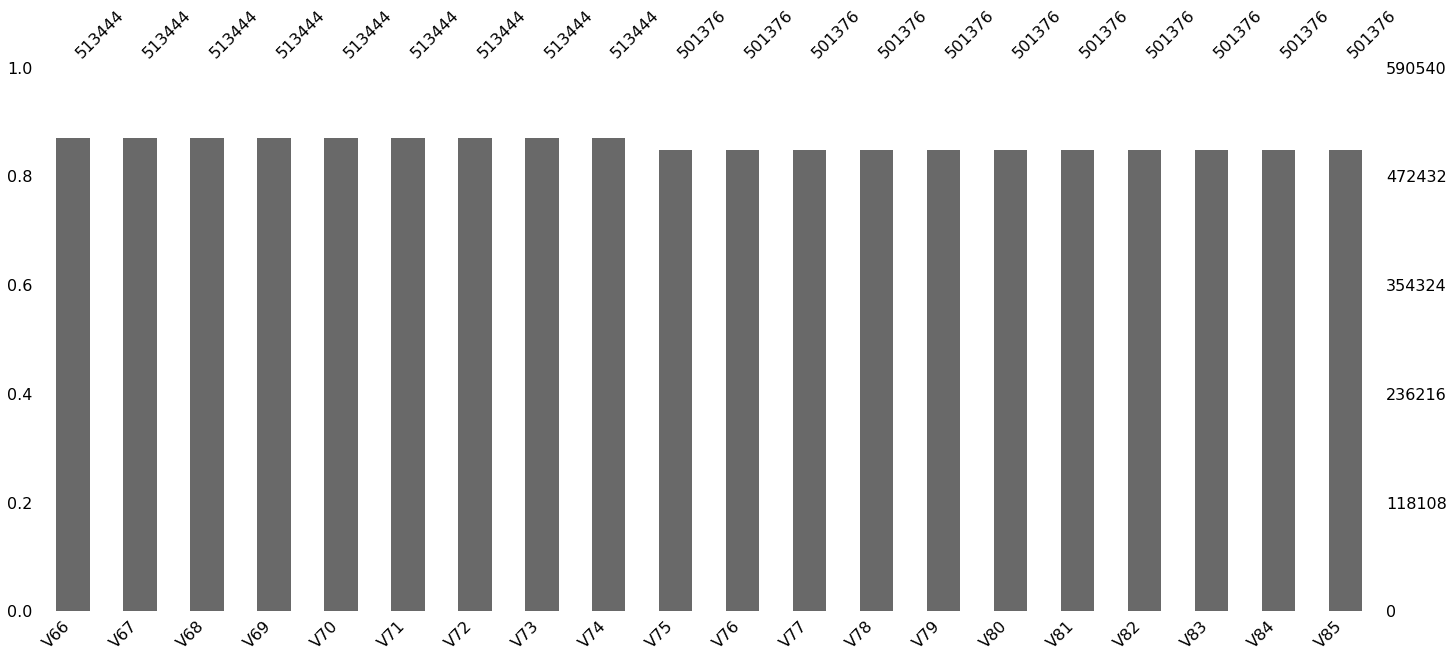

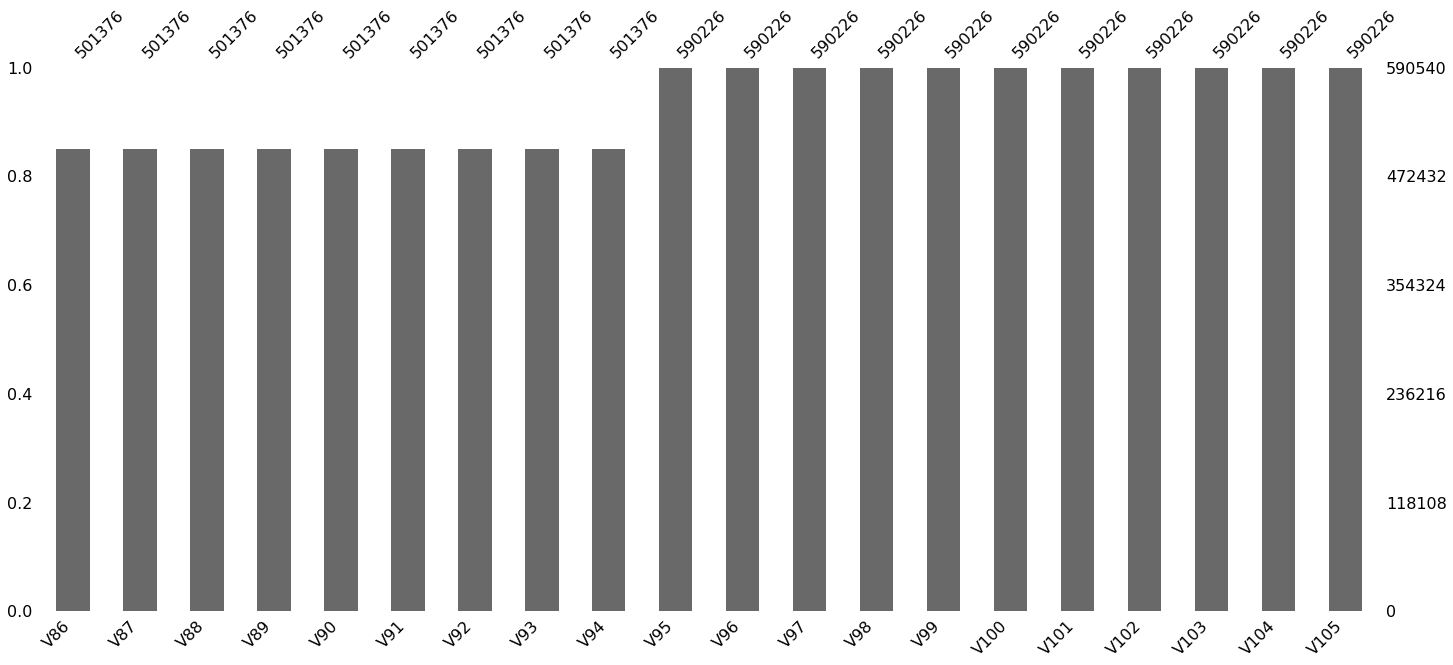

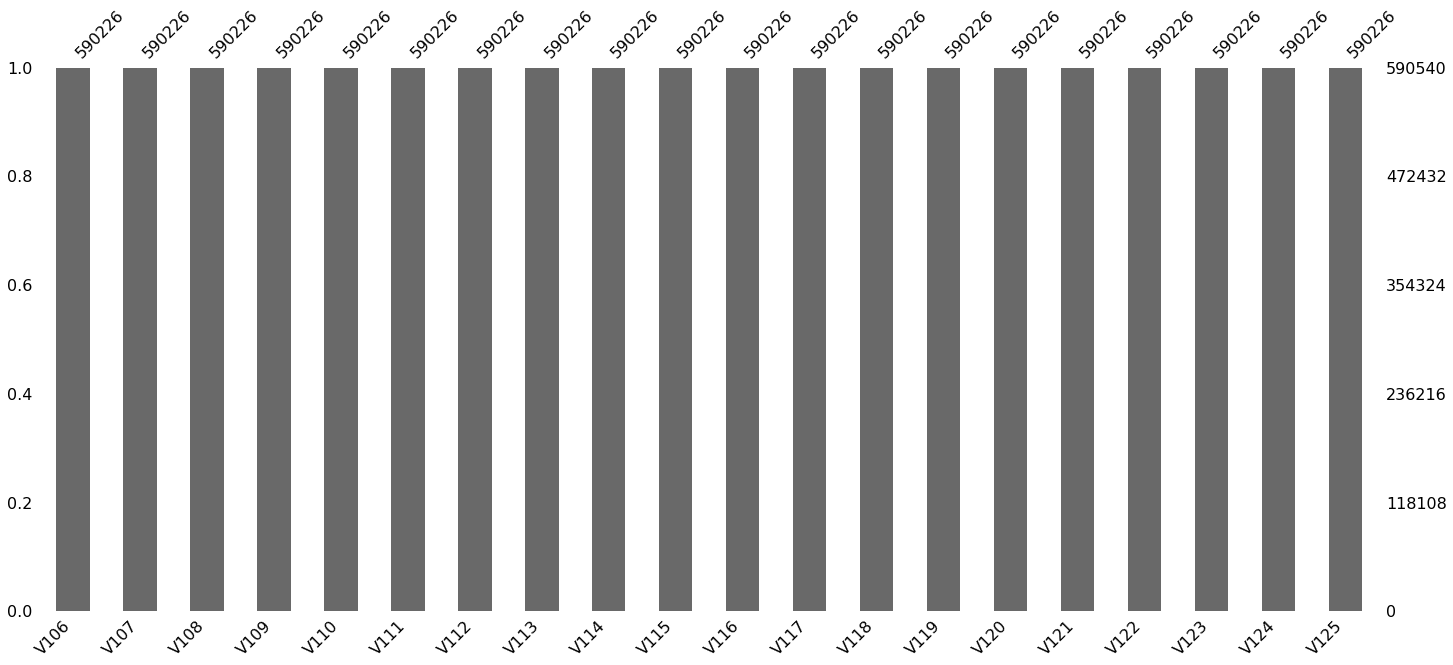

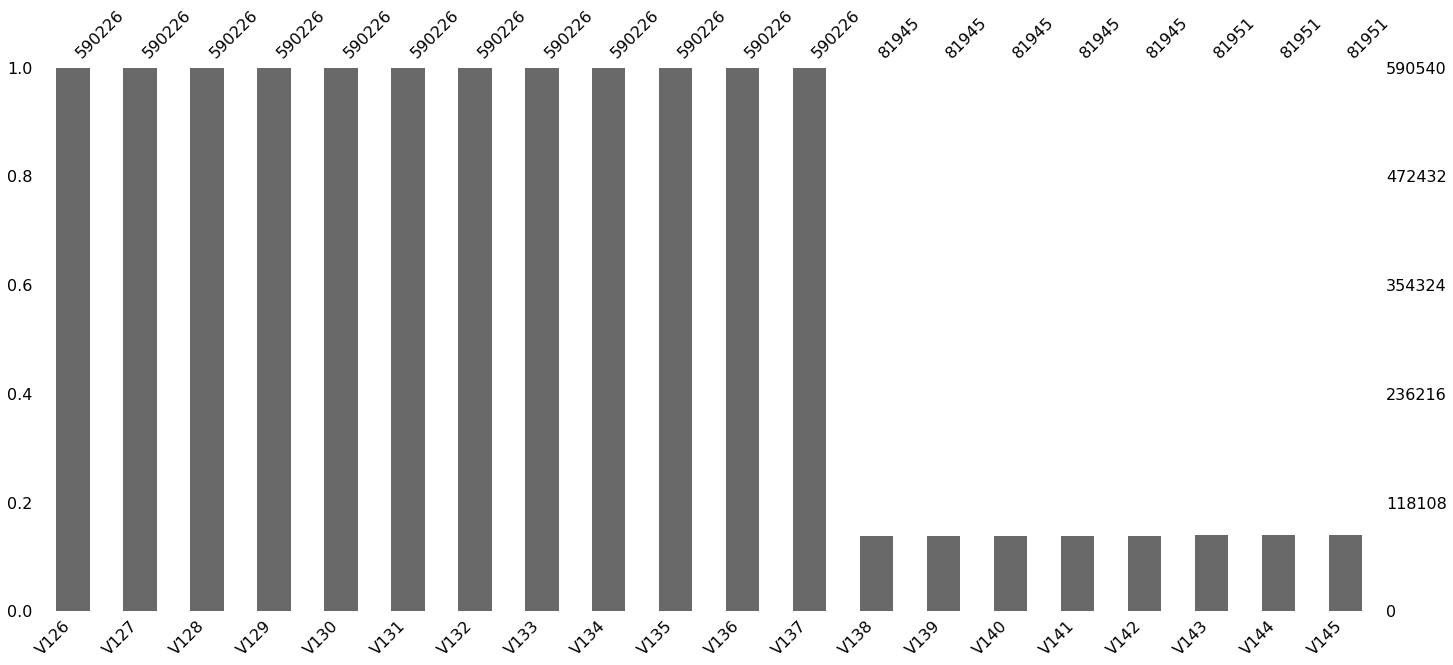

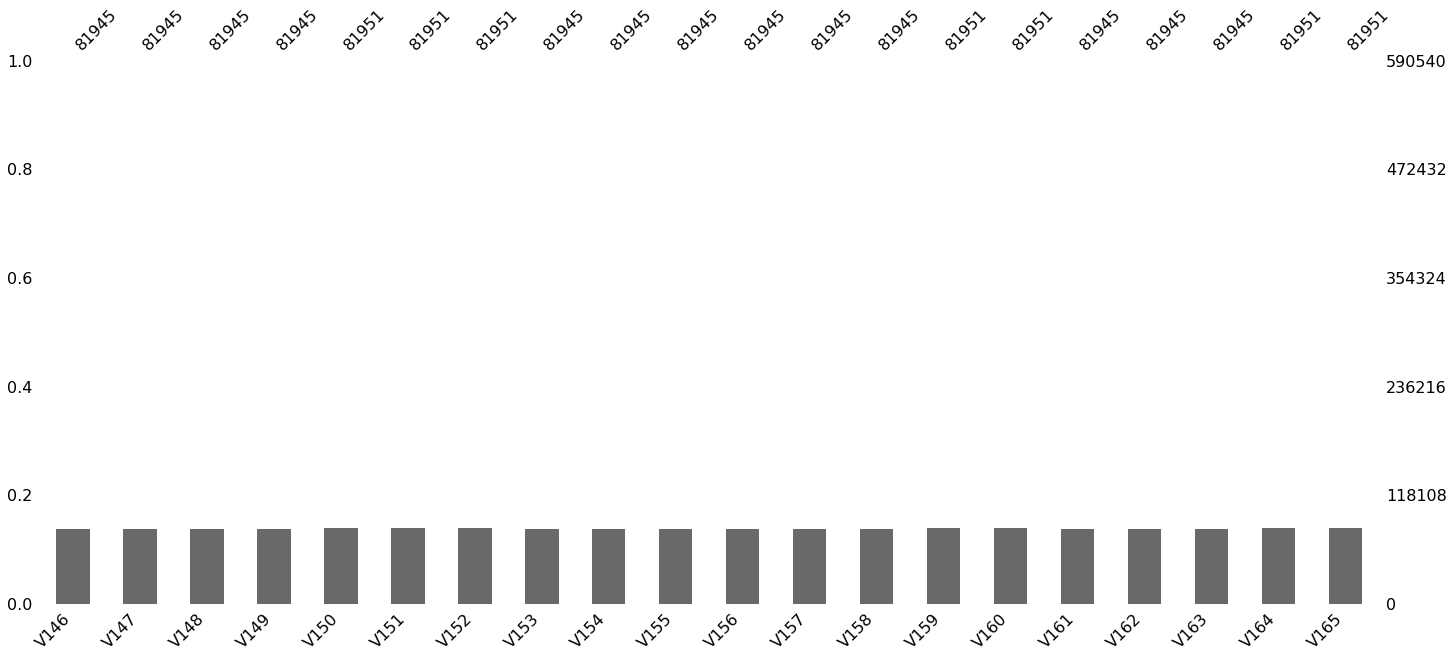

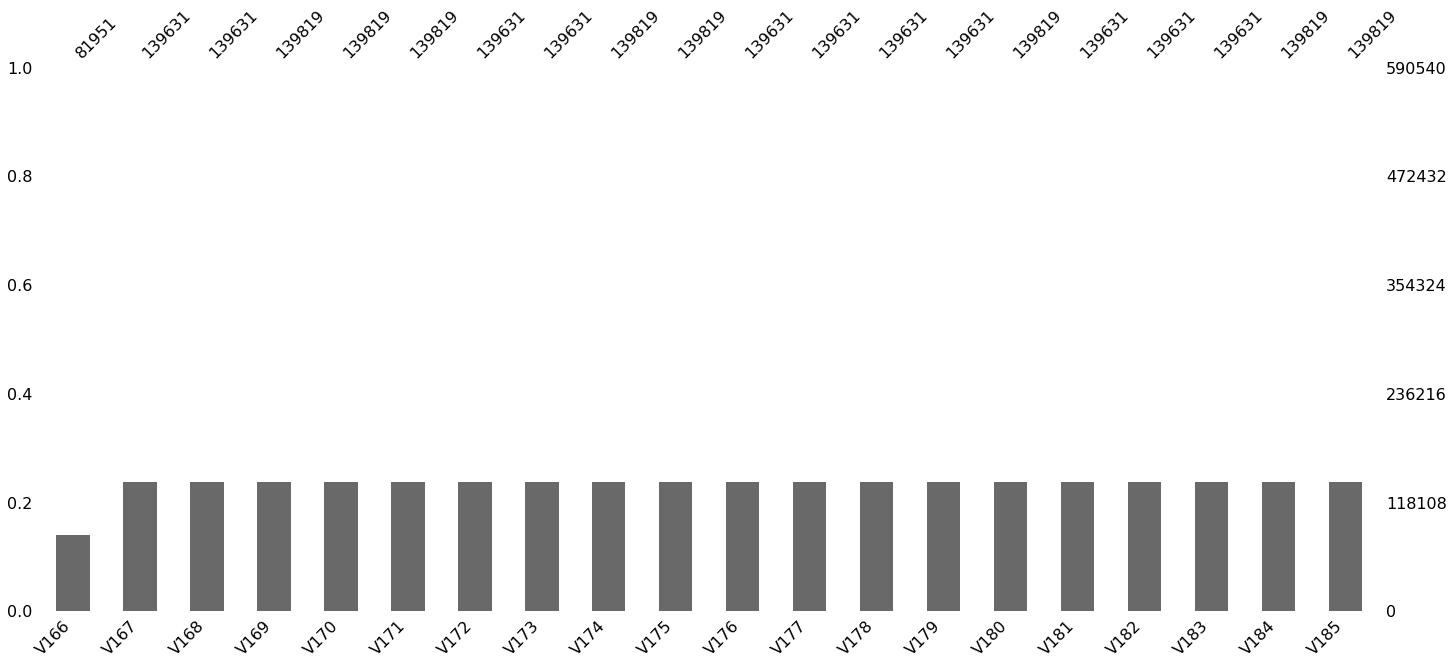

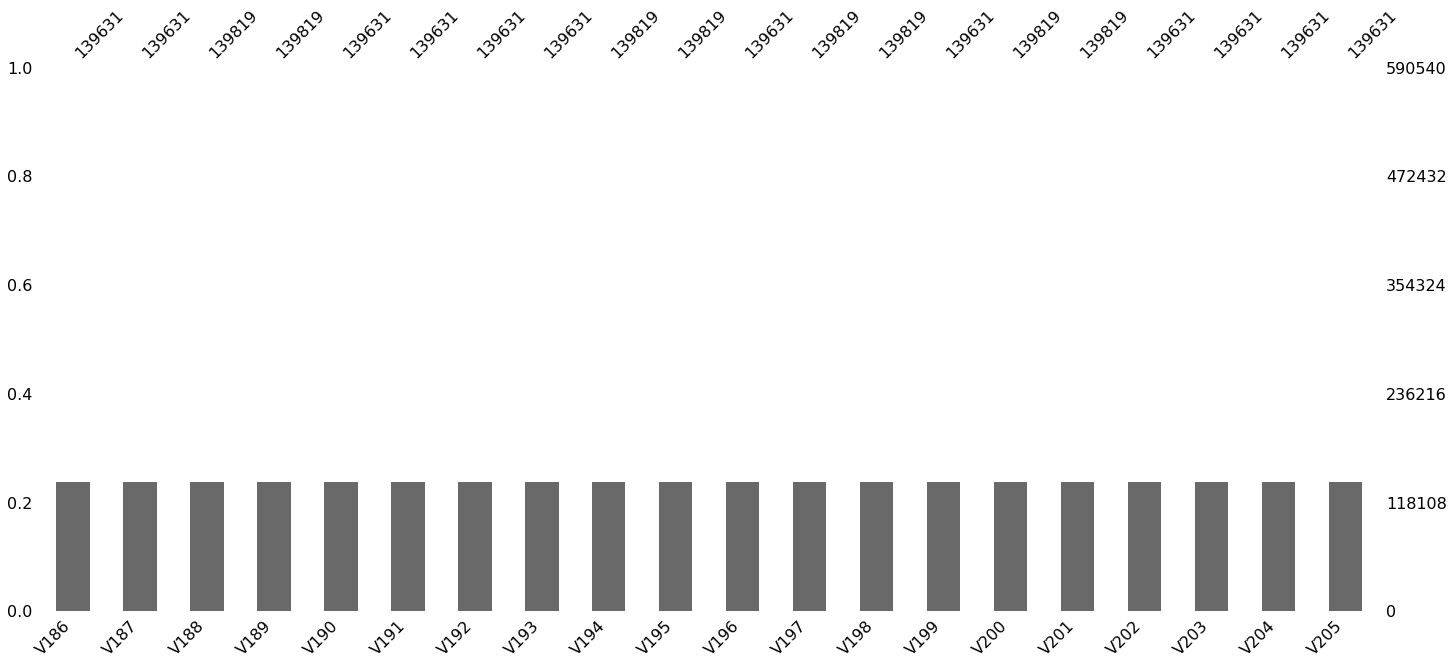

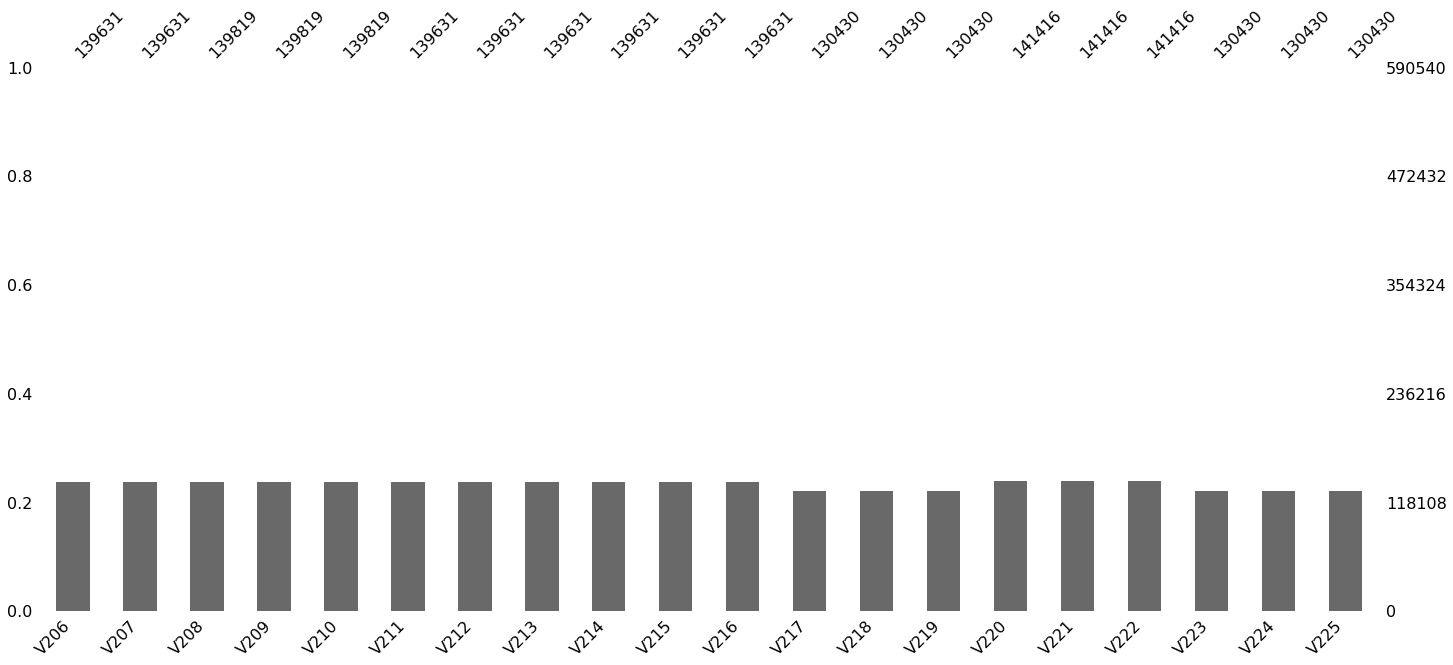

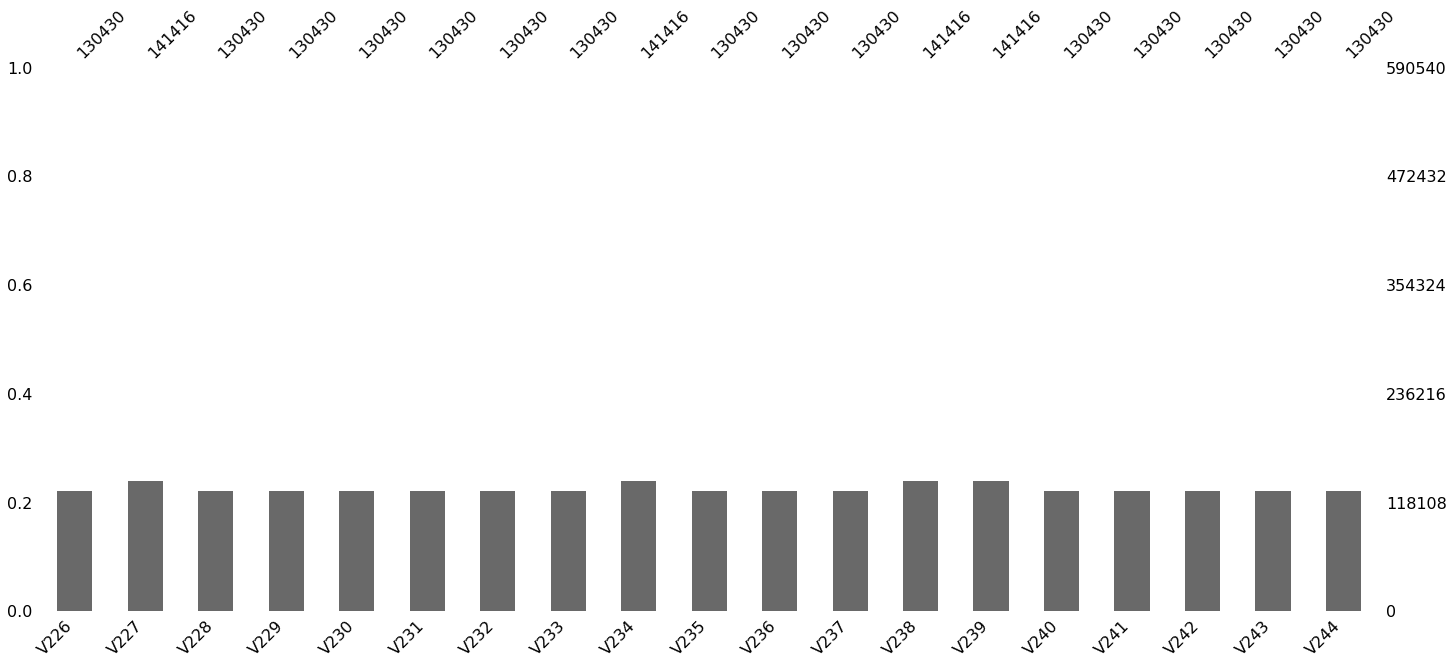

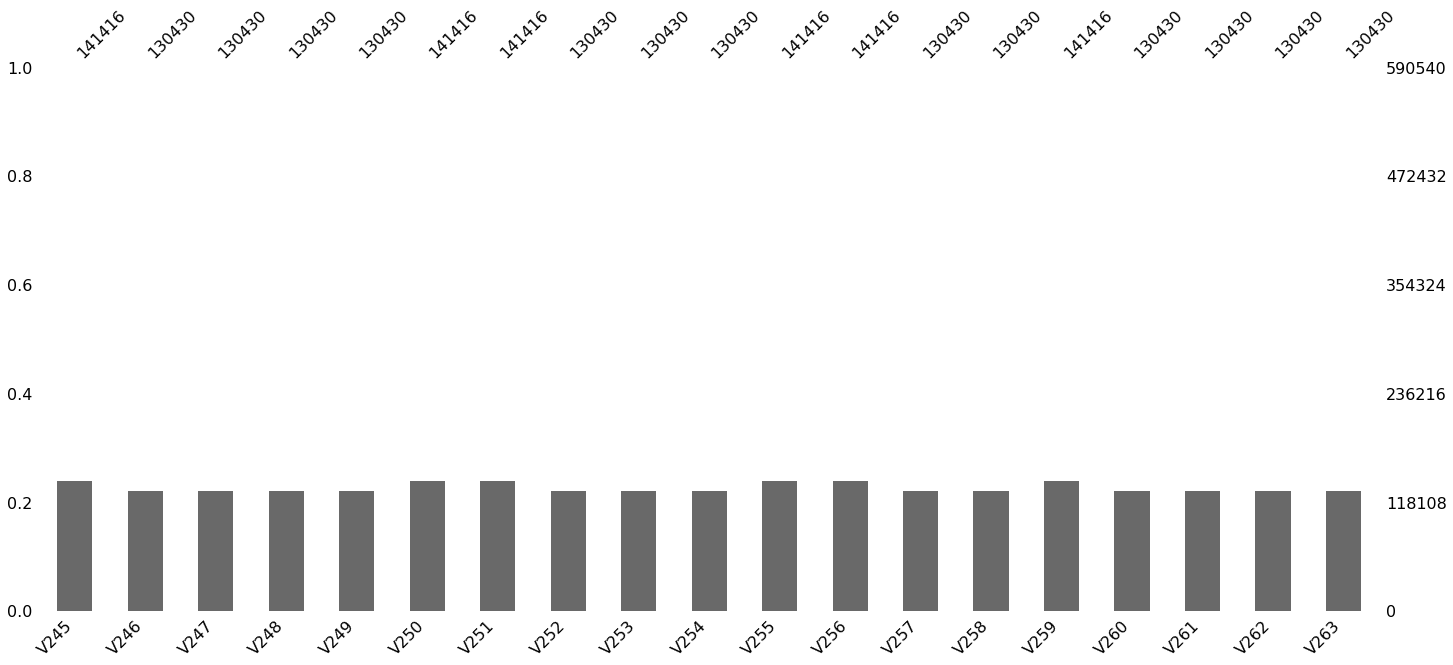

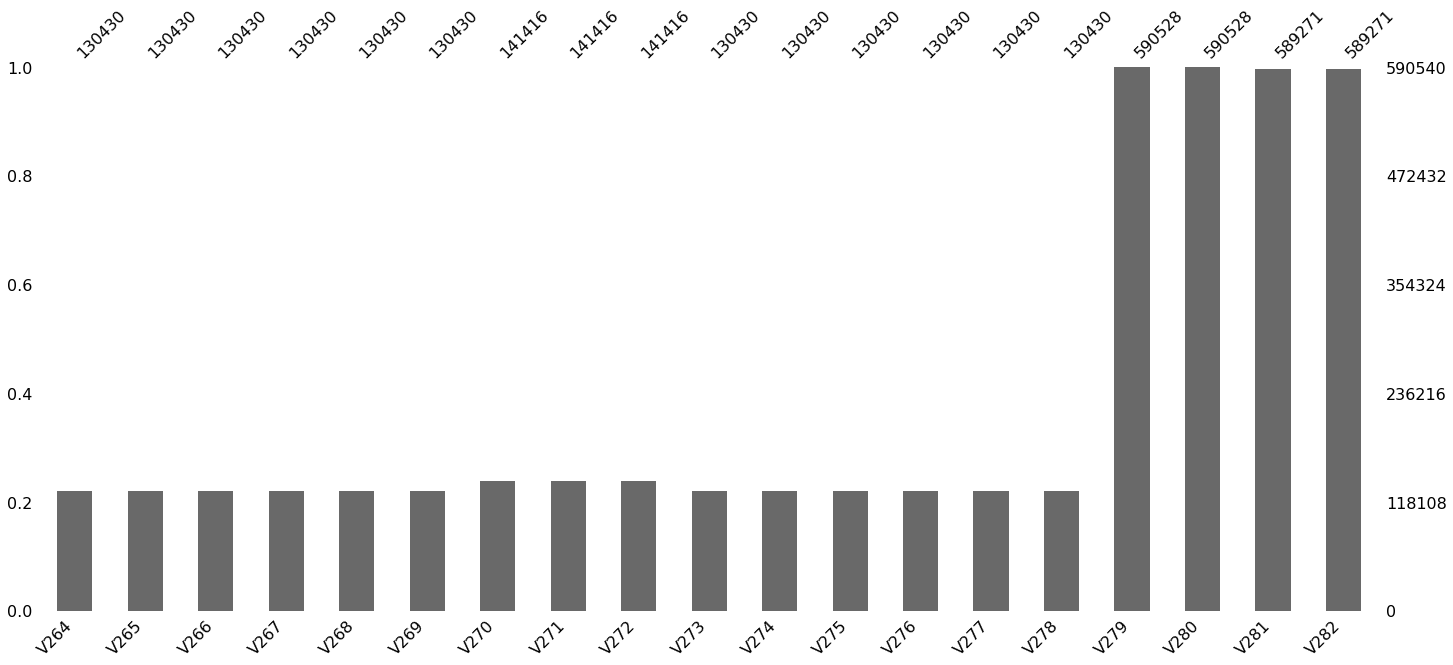

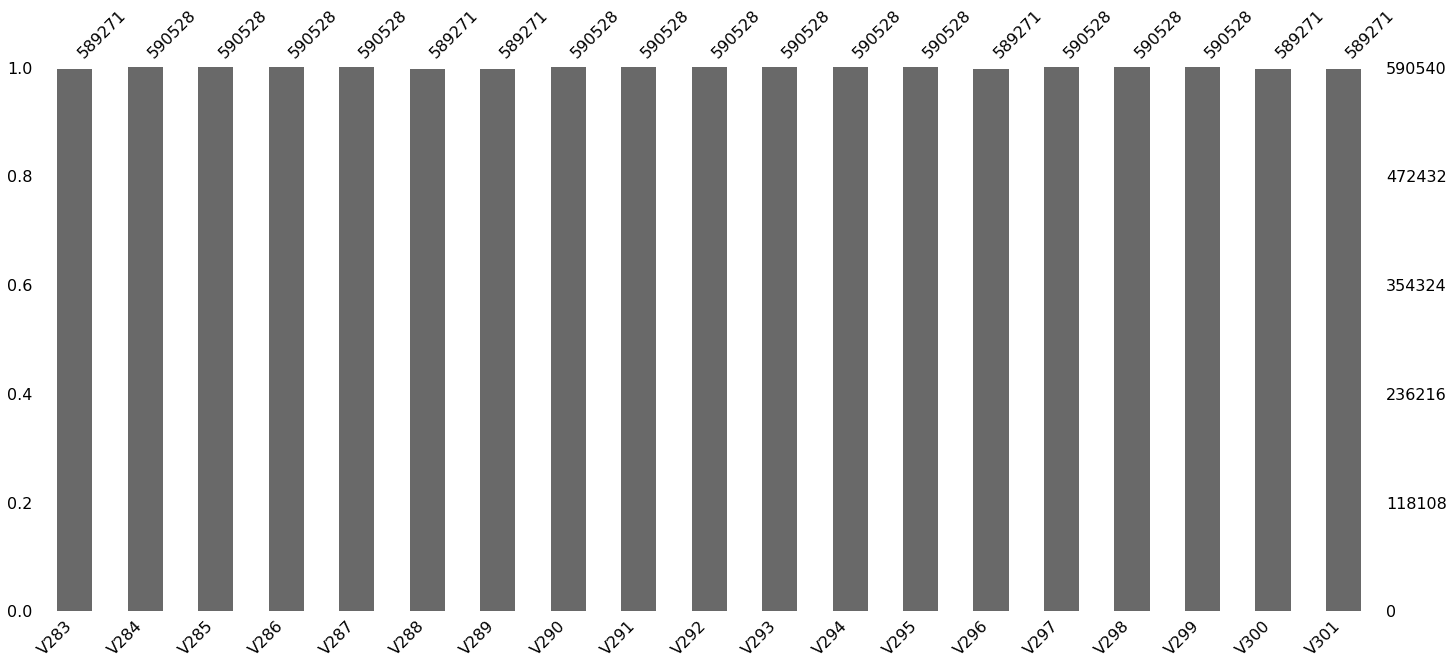

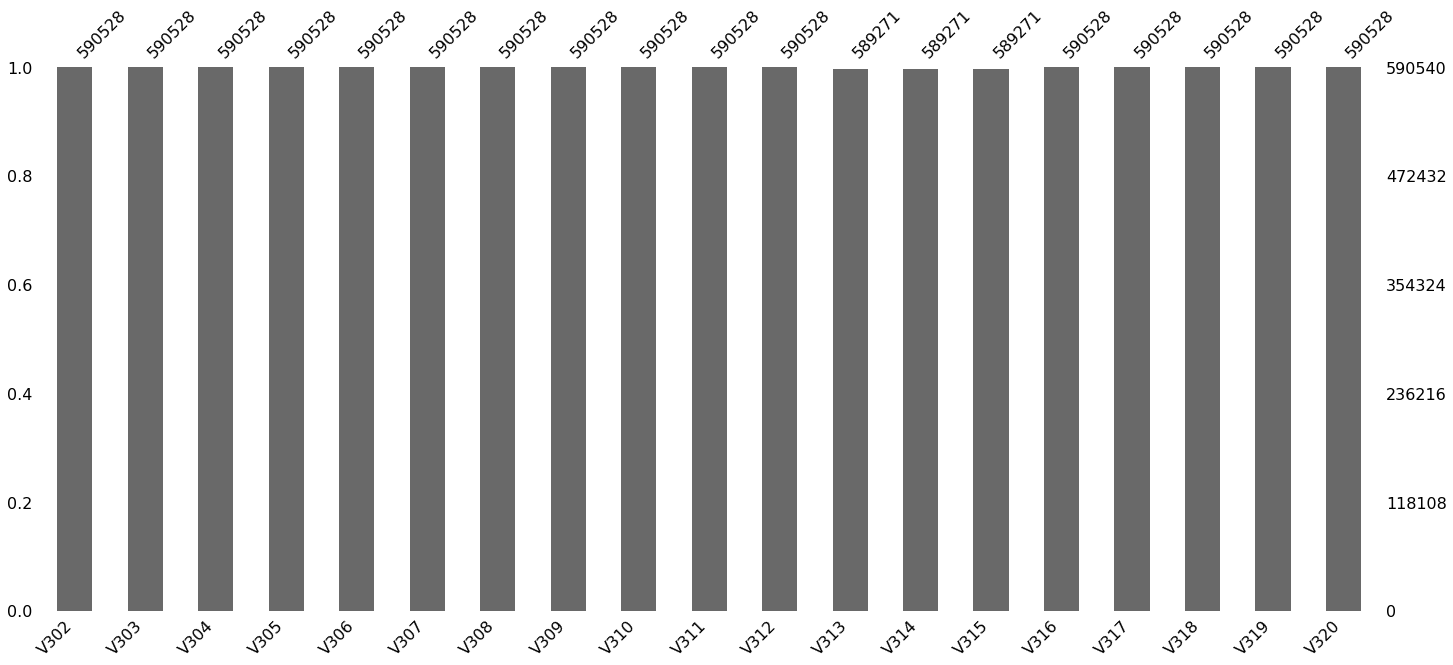

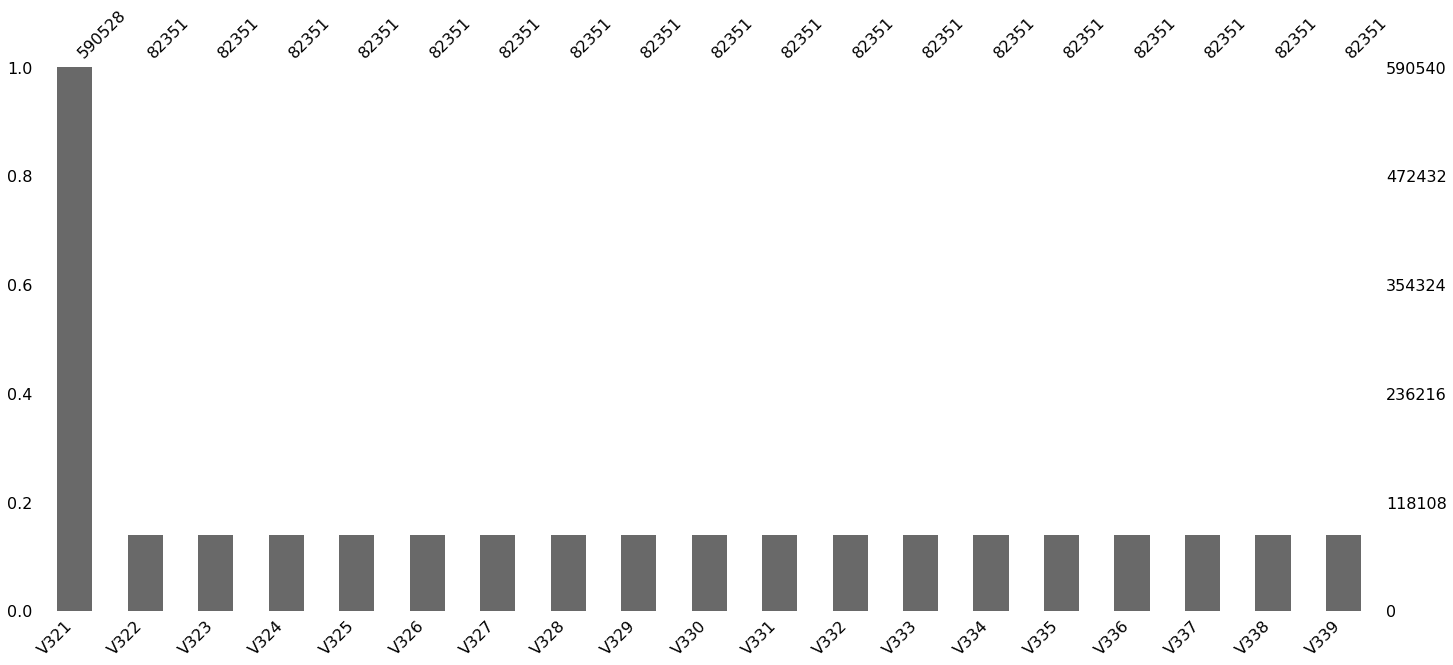

In [12]:
plot_count = 20
column_groups = np.array_split(df_transactions.columns, plot_count)

for columns in column_groups:
    msno.bar(df_transactions[columns])
    plt.show()

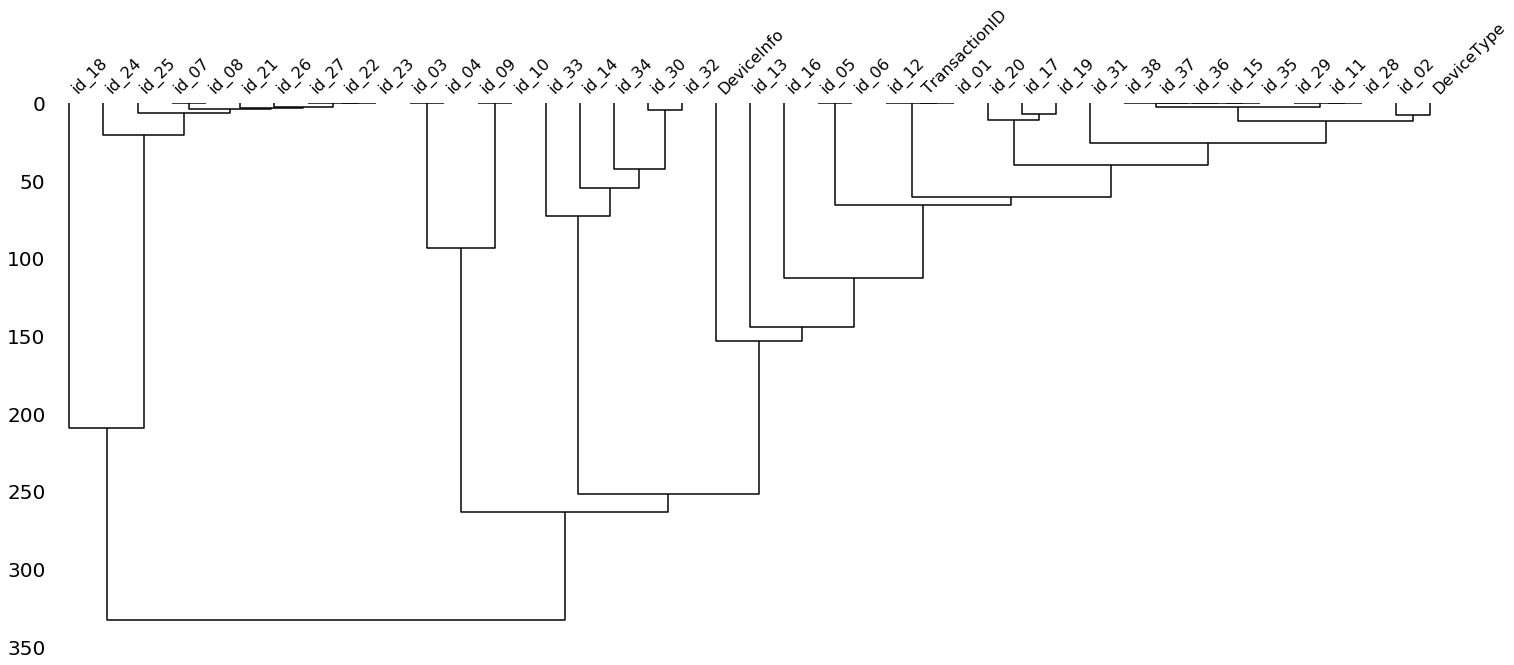

In [15]:
msno.dendrogram(df_identities);

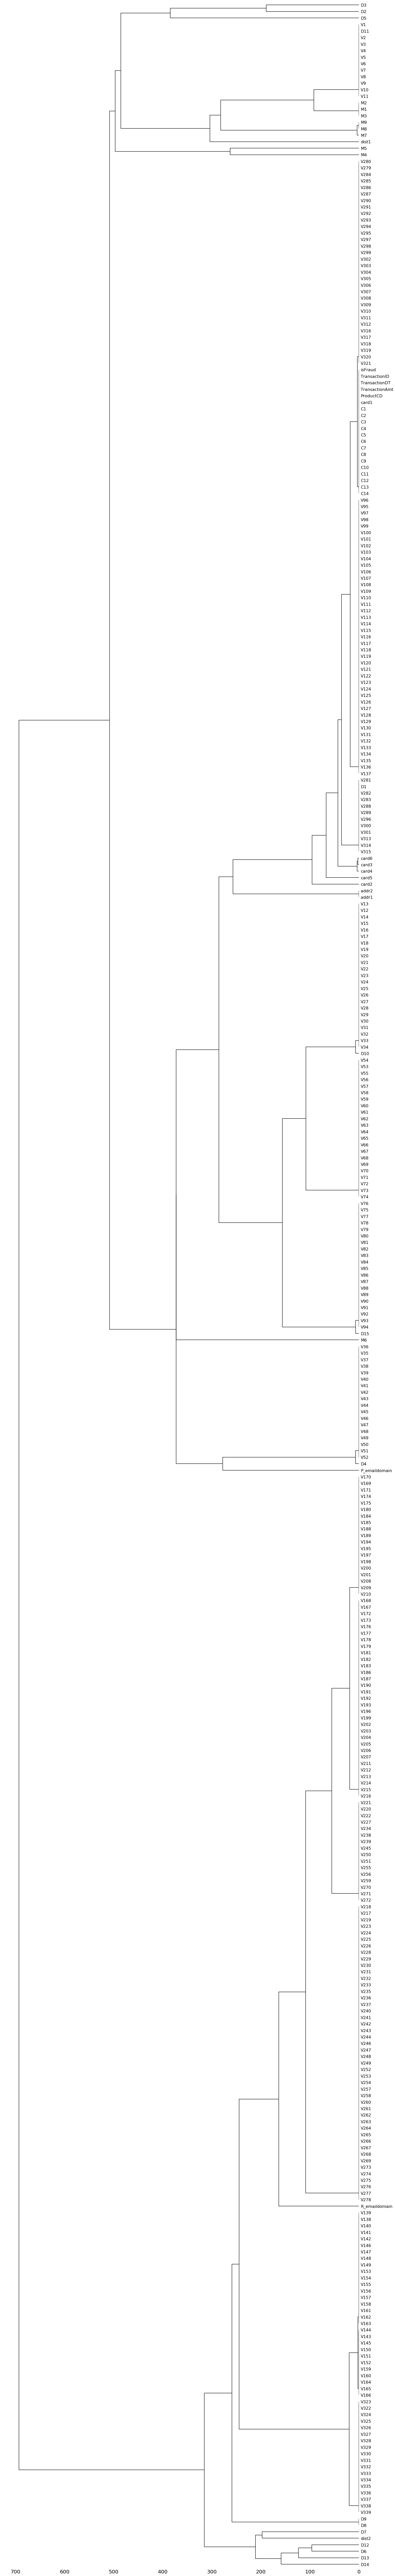

In [16]:
smsno.dendrogram(df_transactions);

#### Attributes analysis

In [51]:
df_identities.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [56]:
df_identities.DeviceInfo.value_counts()

Windows                        47722
iOS Device                     19782
MacOS                          12573
Trident/7.0                     7440
rv:11.0                         1901
                               ...  
R8106                              1
SM-G901F                           1
ZTE BLADE A321 Build/NMF26F        1
SM-S120VL                          1
QwestIE8                           1
Name: DeviceInfo, Length: 1786, dtype: int64

In [57]:
df_identities.DeviceInfo

0              SAMSUNG SM-G892A Build/NRD90M
1                                 iOS Device
2                                    Windows
3                                        NaN
4                                      MacOS
                         ...                
144228               F3111 Build/33.3.A.1.97
144229                   A574BL Build/NMF26F
144230    Moto E (4) Plus Build/NMA26.42-152
144231                                 MacOS
144232           RNE-L03 Build/HUAWEIRNE-L03
Name: DeviceInfo, Length: 144233, dtype: object

In [55]:
df_identities.id_31.value_counts()

chrome 63.0              22000
mobile safari 11.0       13423
mobile safari generic    11474
ie 11.0 for desktop       9030
safari generic            8195
                         ...  
Inco/Minion                  1
chrome 69.0                  1
seamonkey                    1
M4Tel/M4                     1
Samsung/SCH                  1
Name: id_31, Length: 130, dtype: int64

In [53]:
df_identities.id_31

0             samsung browser 6.2
1              mobile safari 11.0
2                     chrome 62.0
3                     chrome 62.0
4                     chrome 62.0
                   ...           
144228    chrome 66.0 for android
144229    chrome 55.0 for android
144230    chrome 65.0 for android
144231                chrome 66.0
144232    chrome 66.0 for android
Name: id_31, Length: 144233, dtype: object

In [48]:
for col in df_identities.columns:
    print(col)

TransactionID
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


In [46]:
for col in df_transactions.columns:
    print(col)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

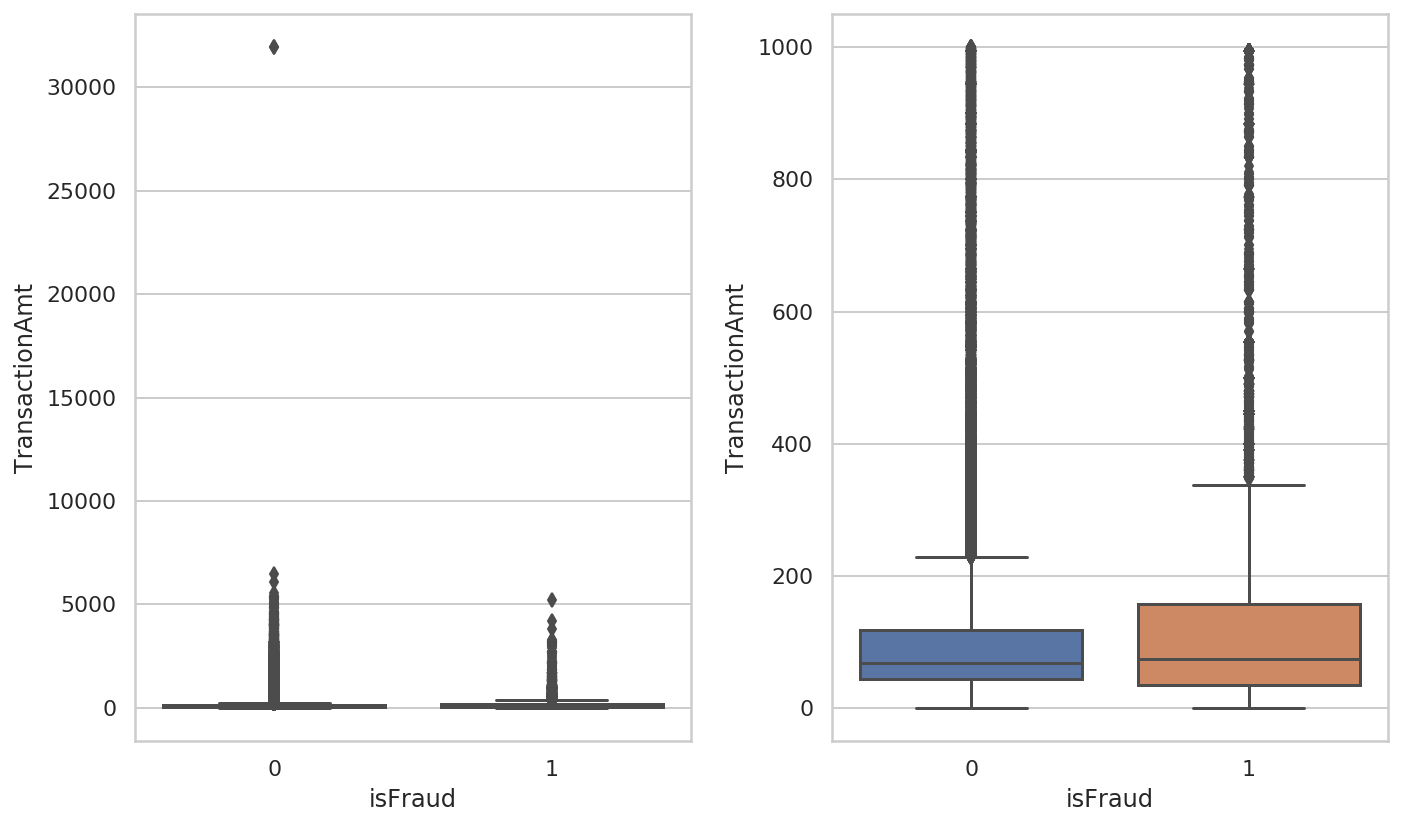

In [43]:
plt.subplot(1, 2, 1)
sns.boxplot(y='TransactionAmt', x='isFraud', data=df_transactions);

plt.subplot(1, 2, 2)
sns.boxplot(y='TransactionAmt', x='isFraud', data=df_transactions[df_transactions.TransactionAmt < 1000])

plt.tight_layout()